In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ImportError: No module named artist

In [139]:
data = pd.read_csv('data/dates_artists.csv')
data.head()

ParserError: Error tokenizing data. C error: out of memory

In [17]:
data.shape

(2425588, 4)

In [2]:
data = pd.read_csv('data/artists.csv')
data.head()

C:\Users\user.user-PC\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False


In [105]:
df = data.copy()

In [106]:
df.shape

(1466083, 10)

In [107]:
df['tags_mb'] = df['tags_mb'].fillna(df['tags_lastfm'])
df['tags_lastfm'] = df['tags_lastfm'].fillna(df['tags_mb'])

In [108]:
df['country_mb'] = df['country_mb'].fillna(df['tags_lastfm'])
df['country_lastfm'] = df['country_lastfm'].fillna(df['country_mb'])

In [109]:
df['artist_mb'] = df['artist_mb'].fillna(df['artist_lastfm'])
df['artist_lastfm'] = df['artist_lastfm'].fillna(df['artist_mb'])

In [110]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

mbid                0.000000
ambiguous_artist    0.000000
artist_mb           0.000003
artist_lastfm       0.000003
listeners_lastfm    0.326941
scrobbles_lastfm    0.326941
country_lastfm      0.408184
country_mb          0.410128
tags_mb             0.702550
tags_lastfm         0.702550
dtype: float64

In [112]:
df=df.drop(['mbid'],axis=1)

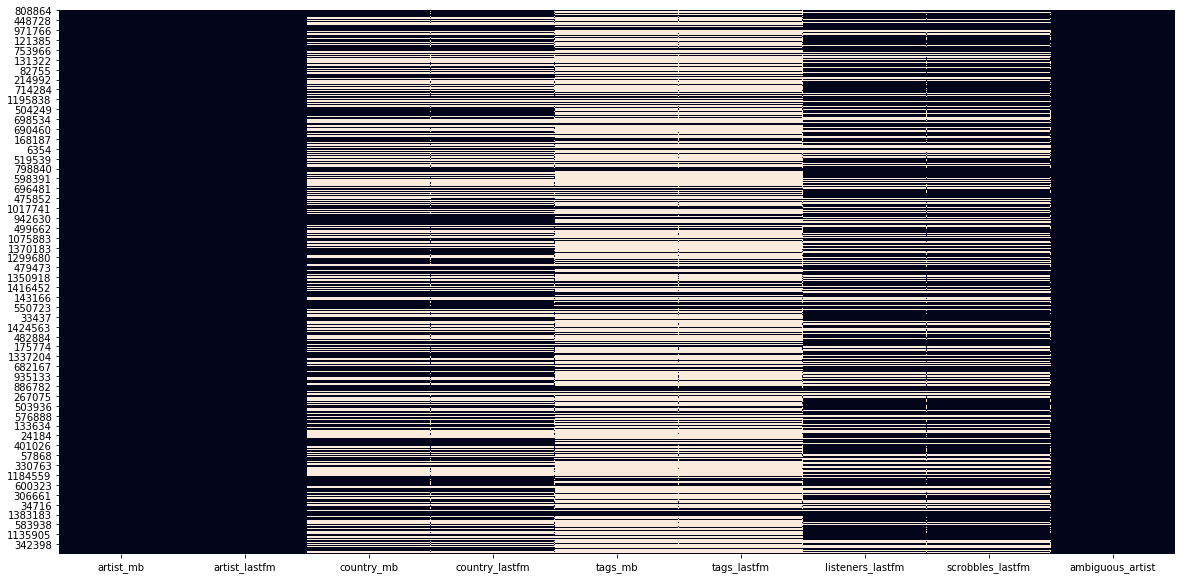

In [113]:
plt.figure(figsize=(20,10))
sns.heatmap(df.sample(100000).isna(),cbar=False)


In [125]:
df.isna().sum()

MemoryError: 

# Nettoyage 

In [126]:
df.shape

(1466083, 9)

In [127]:
df.iloc[:,1:7].columns

MemoryError: 

In [68]:
df=df.drop_duplicates(subset=list(df.iloc[:,1:7].columns))
df.shape

In [71]:
import pandas as pd

# Étape 1 : Créer une colonne "artist_id" pour identifier les doublons
df['artist_id'] = df.apply(lambda x: x['artist_mb'] if pd.notna(x['artist_mb']) else x['artist_lastfm'], axis=1)

# Étape 2 : Grouper par l'identifiant de l'artiste pour agrégation
df_aggregated = df.groupby('artist_id', as_index=False).agg({
    'listeners_lastfm': 'sum',
    'scrobbles_lastfm': 'sum',
    'country_mb': lambda x: x.mode()[0] if not x.mode().empty else None, 
    'country_lastfm': lambda x: x.mode()[0] if not x.mode().empty else None,
    'tags_mb': lambda x: x.mode()[0] if not x.mode().empty else None,
    'tags_lastfm': lambda x: x.mode()[0] if not x.mode().empty else None,
    'ambiguous_artist': 'first'  # Conserver l'indicateur ambigu pour vérifier les cas incertains
})

# Étape 3 : Afficher les données consolidées
print(df_aggregated.head())


In [87]:
df.describe()

,listeners_lastfm,scrobbles_lastfm
count,9.799570e+05,9.799570e+05
mean,6.174943e+03,1.197270e+05
std,5.923552e+04,2.309393e+06
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,4.500000e+01
50%,9.700000e+01,5.720000e+02
75%,7.860000e+02,5.757000e+03
max,5.381567e+06,5.171263e+08


In [86]:
df['listeners_lastfm'].value_counts()

1.0         58906
0.0         43814
2.0         33509
3.0         23960
4.0         19004
5.0         15818
6.0         13693
7.0         12089
8.0         10711
9.0          9896
10.0         8986
11.0         8245
12.0         7716
13.0         7149
14.0         6713
15.0         6444
16.0         6064
17.0         5724
18.0         5531
19.0         5246
20.0         5188
21.0         4926
22.0         4624
23.0         4542
24.0         4392
25.0         4113
26.0         3955
27.0         3921
28.0         3692
29.0         3613
            ...  
31765.0         1
508175.0        1
31684.0         1
507002.0        1
31688.0         1
31690.0         1
31692.0         1
507089.0        1
31695.0         1
31696.0         1
31701.0         1
507340.0        1
31709.0         1
86756.0         1
507367.0        1
86746.0         1
31722.0         1
86740.0         1
86736.0         1
86728.0         1
507721.0        1
31735.0         1
31739.0         1
31742.0         1
31745.0   

In [102]:
from sklearn.preprocessing import MinMaxScaler

df=df.dropna()
# Spécifier les colonnes à normaliser
colonnes_a_normaliser = ['listeners_lastfm','scrobbles_lastfm']

# Initialiser le scaler
scaler = MinMaxScaler()

# Appliquer le scaler uniquement aux colonnes spécifiées
df[colonnes_a_normaliser] = scaler.fit_transform(df[colonnes_a_normaliser])

# Afficher le DataFrame pour vérifier la normalisatiodf.head()

C:\Users\user.user-PC\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user.user-PC\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


               artist_mb          artist_lastfm      country_mb  \
0               Coldplay               Coldplay  United Kingdom   
1              Radiohead              Radiohead  United Kingdom   
2  Red Hot Chili Peppers  Red Hot Chili Peppers   United States   
3                Rihanna                Rihanna   United States   
4                 Eminem                 Eminem   United States   

            country_lastfm                                            tags_mb  \
0           United Kingdom  rock; pop; alternative rock; british; uk; brit...   
1           United Kingdom  rock; electronic; alternative rock; british; g...   
2            United States  rock; alternative rock; 80s; 90s; rap; metal; ...   
3  Barbados; United States  pop; dance; hip hop; reggae; contemporary r b;...   
4            United States  turkish; rap; american; hip-hop; hip hop; hiph...   

                                         tags_lastfm  listeners_lastfm  \
0  rock; alternative; britpop; alter

In [103]:
df.head()

,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,1.000000,0.696371,False
1,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,0.879396,0.966009,False
2,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,0.858641,0.568109,False
3,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,0.847001,0.385300,False
4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,0.839532,0.385800,False


MemoryError: 

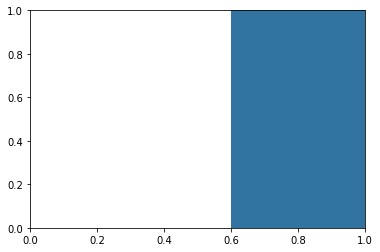

In [120]:
sns.countplot(x='scrobbles_lastfm',hue='ambiguous_artist',data=df)

# analyse

# variables continues

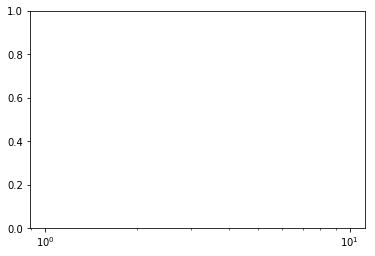

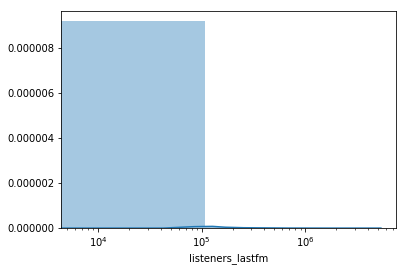

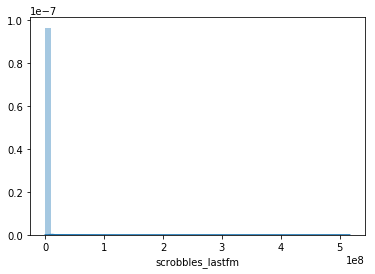

In [95]:
df_hist =df.copy()
for col in df_hist.select_dtypes('float'):
    df_hist.dropna(subset=[col], inplace=True)
    df_hist[col].fillna(0, inplace=True)
    plt.figure()
    sns.distplot(df_hist[col])

# Variables Qualitatives

In [17]:
for col in df.select_dtypes('object'):
    print('{col:-<50} {values}'.format(col=col, values=df[col].unique()))

mbid---------------------------------------------- ['cc197bad-dc9c-440d-a5b5-d52ba2e14234'
 'a74b1b7f-71a5-4011-9441-d0b5e4122711'
 '8bfac288-ccc5-448d-9573-c33ea2aa5c30' ...
 '20a57e37-24b5-4301-855b-35076580fb88'
 '83891a4d-1bf4-4abe-a483-5b3d9d614efa'
 '3d05dd13-f524-4e80-91aa-24094e8b5928']
artist_mb----------------------------------------- ['Coldplay' 'Radiohead' 'Red Hot Chili Peppers' ...
 '\xed\x97\xa4\xec\x9d\xbc\xeb\xa1\x9c'
 '\xec\x84\x9c\xed\x98\x84\xec\xa7\x84'
 '\xea\xb9\x80\xed\x9d\xac\xec\xb2\xa0']
artist_lastfm------------------------------------- ['Coldplay' 'Radiohead' 'Red Hot Chili Peppers' ...
 '\xec\xa1\xb0\xec\xa7\x84\xec\x9b\x90 & \xed\x99\x8d\xec\xa2\x85\xec\x9e\x84'
 '\xec\xb2\x9c\xec\x83\x81\xec\xa7\x80\xed\x9d\xac \xeb\x8b\xa4\xeb\x82\x98 & \xec\x84\xa0\xeb\x8d\xb0\xec\x9d\xb4'
 '\xed\x9d\xac\xec\xb2\xa0']
country_mb---------------------------------------- ['United Kingdom' 'United States' 'France' ...
 'experimental; indie; alternative; illinois' 'rave'
 '

# creation des sous ensembles 

## LastFm

In [12]:
list(df.columns)

['mbid',
 'artist_mb',
 'artist_lastfm',
 'country_mb',
 'country_lastfm',
 'tags_mb',
 'tags_lastfm',
 'listeners_lastfm',
 'scrobbles_lastfm',
 'ambiguous_artist']

In [9]:
colonne_lastfm =list(df.columns[df.columns.to_series().apply(lambda x: x.endswith('_lastfm'))])

In [10]:
lastfm =df[colonne_lastfm]
lastfm.head()

,artist_lastfm,country_lastfm,tags_lastfm,listeners_lastfm,scrobbles_lastfm
0,Coldplay,United Kingdom,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0
1,Radiohead,United Kingdom,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0
2,Red Hot Chili Peppers,United States,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0
3,Rihanna,Barbados; United States,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0
4,Eminem,United States,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0


## Mb

In [12]:
colonne_mb =list(df.columns[df.columns.to_series().apply(lambda x: x.endswith('_mb'))])
mb = df[colonne_mb]

In [13]:
mb.head()

,artist_mb,country_mb,tags_mb
0,Coldplay,United Kingdom,rock; pop; alternative rock; british; uk; brit...
1,Radiohead,United Kingdom,rock; electronic; alternative rock; british; g...
2,Red Hot Chili Peppers,United States,rock; alternative rock; 80s; 90s; rap; metal; ...
3,Rihanna,United States,pop; dance; hip hop; reggae; contemporary r b;...
4,Eminem,United States,turkish; rap; american; hip-hop; hip hop; hiph...


In [65]:
mb.shape

(1466083, 3)

In [15]:
mb['artist_mb'].value_counts()

Vortex                       83
Moloch                       76
Darkness                     68
Sol                          58
Amok                         49
Angel                        47
Silence                      47
Bobo                         45
Pegasus                      45
Eden                         43
Oblivion                     41
Necropolis                   40
Blackout                     38
Nemesis                      36
Phobos                       36
Alex                         36
Jade                         36
Nova                         36
Torment                      35
Abaddon                      35
Karma                        34
Paranoia                     33
Aura                         33
Reflex                       33
Maya                         33
Mirage                       32
Trinity                      32
Seven                        31
Oasis                        30
Magma                        30
                             ..
Half Eye

In [14]:
mb[mb['artist_mb']=='Vortex']

,artist_mb,country_mb,tags_mb
50303,Vortex,Belgium,punk; belgium
1388418,Vortex,NaN,NaN
1388419,Vortex,France,improvised music; eai
1388420,Vortex,Germany,NaN
1388421,Vortex,Japan,NaN
1388422,Vortex,Nicaragua,NaN
1388423,Vortex,Portugal,NaN
1388424,Vortex,France,NaN
1388425,Vortex,Croatia,NaN
1388426,Vortex,Hungary,NaN


In [80]:
lastfm[lastfm['artist_lastfm']=='Eminem']

,artist_lastfm,country_lastfm,tags_lastfm,listeners_lastfm,scrobbles_lastfm
4,Eminem,United States,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0


In [81]:
df[df['artist_mb']=='Vortex']

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
50303,480ddee3-838e-487d-9317-e42995267461,Vortex,Vortex,Belgium,NaN,punk; belgium,thrash metal; dark ambient; Technical Death Me...,16057.0,137466.0,False
1388418,9680feeb-fca7-4438-b8fd-4e00ece3c9f0,Vortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1388419,083ad293-4c25-487a-b674-1b2622e8eab1,Vortex,NaN,France,NaN,improvised music; eai,NaN,NaN,NaN,False
1388420,aaeedeb4-4556-43e9-bbed-c1af16c60a2b,Vortex,NaN,Germany,NaN,NaN,NaN,NaN,NaN,False
1388421,13bd7760-e398-47d1-9483-9af219b351a8,Vortex,NaN,Japan,NaN,NaN,NaN,NaN,NaN,False
1388422,ef2ec80b-f3f1-47e2-b063-8995343317be,Vortex,NaN,Nicaragua,NaN,NaN,NaN,NaN,NaN,False
1388423,e256aa89-9b2b-440f-8f72-a600682c9827,Vortex,NaN,Portugal,NaN,NaN,NaN,NaN,NaN,False
1388424,7125c922-973a-4fd6-a47b-99562c84701a,Vortex,NaN,France,NaN,NaN,NaN,NaN,NaN,False
1388425,e258d13e-0ac2-405c-947a-afbcf4447110,Vortex,NaN,Croatia,NaN,NaN,NaN,NaN,NaN,False
1388426,eb520caf-6645-46e4-8bea-8b434fbd97ea,Vortex,NaN,Hungary,NaN,NaN,NaN,NaN,NaN,False


In [82]:
df.shape

(1466083, 10)

In [83]:
df.dropna()

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False
6,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,Kanye West,United States,United States,synthpop; pop; american; hip-hop; hip hop; ele...,Hip-Hop; rap; hip hop; rnb; Kanye West; seen l...,4390502.0,238603850.0,False
7,5b11f4ce-a62d-471e-81fc-a69a8278c7da,Nirvana,Nirvana,United States,United States,rock; alternative rock; 90s; punk; american; e...,Grunge; rock; alternative; alternative rock; 9...,4272894.0,222303859.0,False
8,9c9f1380-2516-4fc9-a3e6-f9f61941d090,Muse,Muse,United Kingdom,United Kingdom,rock; electronic; synthpop; alternative rock; ...,alternative rock; rock; alternative; Progressi...,4089612.0,344838631.0,False
9,0383dadf-2a4e-4d10-a46a-e9e041da8eb3,Queen,Queen,United Kingdom,United Kingdom,rock; progressive rock; 70s; 80s; 90s; pop-roc...,classic rock; rock; 80s; hard rock; glam rock;...,4023379.0,191711573.0,False
10,67f66c07-6e61-4026-ade5-7e782fad3a5d,Foo Fighters,Foo Fighters,United States,United States,rock; alternative rock; american; grunge; hard...,rock; alternative rock; Grunge; alternative; s...,4005236.0,194253620.0,False
